# ML Assignment 1

Data set 1 - Bank Account Fraud Dataset \
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 \
Data set 2 - Customer Segmentation \
https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv


In [1]:
# Load function and data

In [2]:
%run ./ML_assignment1_Functions.ipynb

In [3]:
# Data set 1
# Boosting

In [4]:
# !pip install xgboost
# !pip install graphviz

In [5]:
import xgboost as xgboost
# load data
df = load_data('Base.csv')

In [6]:
# model1.1 - Xgboost with Feature engineering

In [7]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model

xgb = xgboost.XGBClassifier(random_state=0, n_estimators = 3, max_depth = 2 ,n_jobs=-1)
xgb.fit(X_train, y_train)
xgb_fe = model(xgb, X_train, y_train, X_valid, y_valid)

xgb_fe['n_estimators'] = 3
xgb_fe['max_depth'] = 2
xgb_fe['name'] = 'xgb_Feature_engineering'
xgb_fe

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,n_estimators,max_depth,name
0,0.791,0.823,0.823,0.796,0.791,0.799,0.28125,3,2,xgb_Feature_engineering


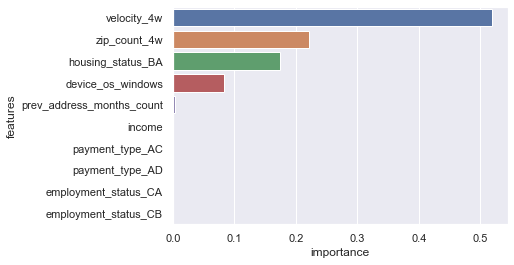

In [8]:
importance_graph(xgb, X_train)

In [9]:
## model1.2 - Xgboost with pruning

In [10]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'n_estimators': [3,6,9,30],
             'max_depth': [2,4,6,8]}
xgb_tune_perf = pd.DataFrame()
for x in params['n_estimators']:
    for y in params['max_depth']:
        xgb = xgboost.XGBClassifier(random_state = 0, n_estimators=x, max_depth=y)
        fe_perf_loop = model(xgb, X_train, y_train, X_valid, y_valid)
        fe_perf_loop['n_estimators'] = x
        fe_perf_loop['max_depth'] = y
        xgb_tune_perf = xgb_tune_perf.append(fe_perf_loop)
xgb_tune_perf['name'] = 'xgb_tune'
xgb_tune_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,n_estimators,max_depth,name
0,0.791,0.823,0.823,0.796,0.791,0.799,0.20312,3,2,xgb_tune
0,0.786,0.822,0.830,0.792,0.786,0.794,0.12500,3,4,xgb_tune
0,0.794,0.836,0.866,0.799,0.794,0.801,0.35938,3,6,xgb_tune
0,0.802,0.863,0.911,0.804,0.802,0.809,0.34375,3,8,xgb_tune
0,0.792,0.823,0.824,0.797,0.792,0.800,0.39062,6,2,xgb_tune
0,0.796,0.829,0.837,0.803,0.796,0.804,0.40625,6,4,xgb_tune
0,0.788,0.846,0.875,0.791,0.788,0.795,0.39062,6,6,xgb_tune
0,0.810,0.871,0.929,0.806,0.810,0.816,0.53125,6,8,xgb_tune
0,0.791,0.822,0.823,0.796,0.791,0.799,0.31250,9,2,xgb_tune
0,0.794,0.830,0.840,0.803,0.794,0.802,0.45312,9,4,xgb_tune


In [11]:
## model1.3 - Neural network with Grid Search

In [12]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model

t_start = process_time()

params = {'n_estimators': range(2,20,2),
             'max_depth': range(2,20,2),
         }
xgb = GridSearchCV(xgboost.XGBClassifier(), params, scoring='roc_auc', n_jobs=-1, cv=3)
xgb.fit(X=X_train, y=y_train)
t_stop = process_time()
print (xgb.best_score_, xgb.best_params_, 'time spend: ', round(t_stop - t_start, 3)) 
ne = xgb.best_params_['n_estimators']
md = xgb.best_params_['max_depth']

0.9609967553268439 {'max_depth': 14, 'n_estimators': 18} time spend:  3.328


In [13]:
xgb = xgboost.XGBClassifier(max_depth = md, n_estimators = ne,
                            colsample_bytree=0.9,subsample= 0.9)
xgb_gs_perf = model(xgb, X_train, y_train, X_valid, y_valid)
xgb_gs_perf['name'] = 'xgb_grid_search'
xgb_gs_perf['n_estimators'] = ne
xgb_gs_perf['max_depth'] = md
xgb_gs_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name,n_estimators,max_depth
0,0.791,0.914,1.0,0.778,0.791,0.797,1.71875,xgb_grid_search,18,14


In [14]:
# model4 - gboost with learning curve

In [15]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# create an empty df for output
xgb_lc_perf_out = pd.DataFrame()
for r in [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]:
    # frac train set to build model
#     print(len(X_train))
    X_trainf = X_train.sample(frac = r, random_state=0)
    y_trainf = y_train.loc[X_trainf.index]
    
#     print(len(X_trainf), len(y_trainf))
    # feature engineering
    X_trainf, X_valid, X_test = ohe(X_trainf, X_valid, X_test)
    # oversampling
    X_trainf, y_trainf = oversampling(X_trainf, y_trainf)
    # model
    params = {'n_estimators': ne,
          'max_depth': md}
    xgb = xgboost.XGBClassifier(random_state = 0, max_depth = md, n_estimators = ne)
#     xgb.fit(X_trainf, y_trainf)
#     # plot loss curve
#     plt.plot(xgb.loss_curve_, label = "train_size_"+str(r))
#     plt.xlabel("Iteration")
#     plt.ylabel("Loss")
#     plt.legend()
    lc_perf = model(xgb, X_trainf, y_trainf, X_valid, y_valid)
    # add columns
    lc_perf['train_ratio'] = str(r)
    lc_perf['n_estimators'] = ne
    lc_perf['max_depth'] = md
    lc_perf['name'] = 'xgb_train_size'
    xgb_lc_perf_out = xgb_lc_perf_out.append(lc_perf)
    
xgb_lc_perf_out

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,train_ratio,n_estimators,max_depth,name
0,0.732,0.777,0.830,0.731,0.732,0.743,0.04688,0.1,18,14,xgb_train_size
0,0.805,0.795,0.843,0.796,0.805,0.810,0.35938,0.2,18,14,xgb_train_size
0,0.902,0.889,0.905,0.871,0.902,0.902,0.31250,0.3,18,14,xgb_train_size
0,0.964,0.955,0.958,0.948,0.964,0.963,0.43750,0.4,18,14,xgb_train_size
0,0.954,0.981,1.000,0.961,0.954,0.954,0.42188,0.5,18,14,xgb_train_size
0,0.869,0.945,1.000,0.861,0.869,0.871,0.65625,0.6,18,14,xgb_train_size
0,0.851,0.935,1.000,0.849,0.851,0.855,0.65625,0.7,18,14,xgb_train_size
0,0.822,0.920,1.000,0.801,0.822,0.825,0.75000,0.8,18,14,xgb_train_size
0,0.798,0.917,1.000,0.771,0.798,0.801,1.17188,0.9,18,14,xgb_train_size
0,0.788,0.913,1.000,0.747,0.788,0.789,1.39062,1.0,18,14,xgb_train_size


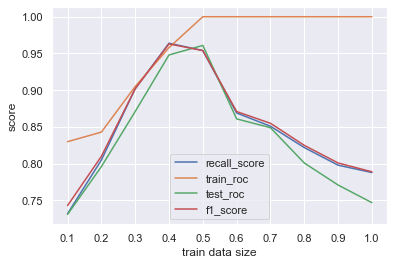

In [16]:
learning_curve_graph(xgb_lc_perf_out)

In [17]:
# Xgboost test set output

In [18]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'n_estimators': ne,
          'max_depth': md}
xgb = xgboost.XGBClassifier(random_state = 0, max_depth = md, n_estimators = ne)
xgb.fit(X_train, y_train)
xgb_test_perf = model(xgb, X_train, y_train, X_test, y_test)
xgb_test_perf['n_estimators'] = ne
xgb_test_perf['max_depth'] = md
xgb_test_perf['name'] = 'xgb_test'
xgb_test_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,n_estimators,max_depth,name
0,0.793,0.911,1.0,0.767,0.793,0.797,1.8125,18,14,xgb_test


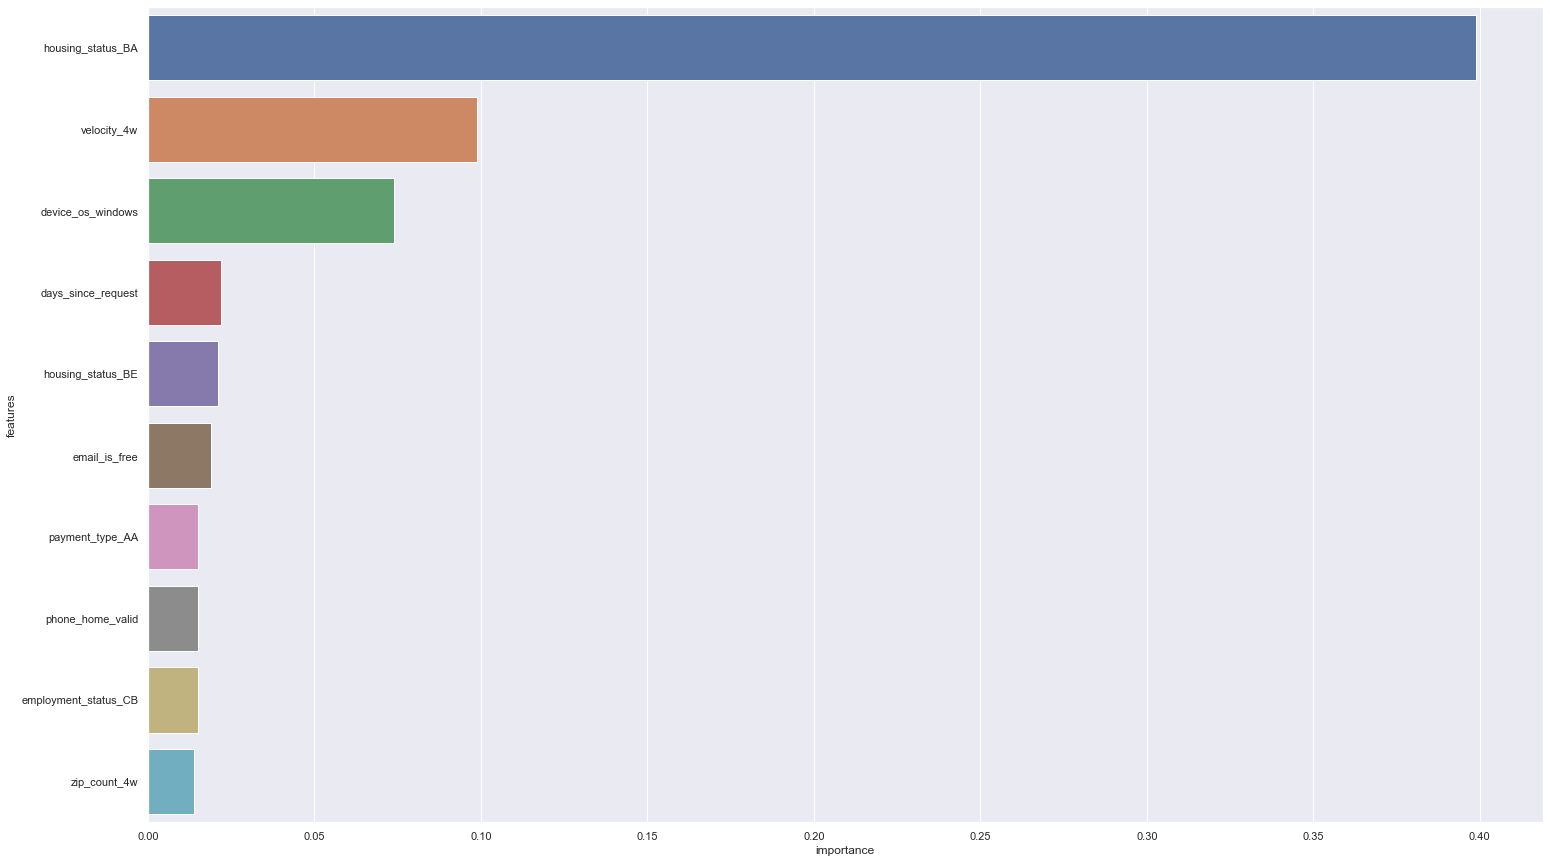

In [19]:
importance_graph(xgb, X_train)

In [20]:
xgb_performance = pd.DataFrame()
xgb_performance=xgb_performance.append([xgb_fe,xgb_tune_perf,xgb_gs_perf,xgb_lc_perf_out,xgb_test_perf]).reset_index()
xgb_performance

,index,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,n_estimators,max_depth,name,train_ratio
0,0,0.791,0.823,0.823,0.796,0.791,0.799,0.28125,3,2,xgb_Feature_engineering,NaN
1,0,0.791,0.823,0.823,0.796,0.791,0.799,0.20312,3,2,xgb_tune,NaN
2,0,0.786,0.822,0.830,0.792,0.786,0.794,0.12500,3,4,xgb_tune,NaN
3,0,0.794,0.836,0.866,0.799,0.794,0.801,0.35938,3,6,xgb_tune,NaN
4,0,0.802,0.863,0.911,0.804,0.802,0.809,0.34375,3,8,xgb_tune,NaN
5,0,0.792,0.823,0.824,0.797,0.792,0.800,0.39062,6,2,xgb_tune,NaN
6,0,0.796,0.829,0.837,0.803,0.796,0.804,0.40625,6,4,xgb_tune,NaN
7,0,0.788,0.846,0.875,0.791,0.788,0.795,0.39062,6,6,xgb_tune,NaN
8,0,0.810,0.871,0.929,0.806,0.810,0.816,0.53125,6,8,xgb_tune,NaN
9,0,0.791,0.822,0.823,0.796,0.791,0.799,0.31250,9,2,xgb_tune,NaN


In [21]:
xgb_performance.to_excel('./performance/xgb_perf_data1.xlsx',index=False)

# Data 2

In [22]:
import xgboost as xgboost
# load data
df = load_data('customer_segment.csv')
df.drop(columns= ['ID'],inplace=True)
# transform target variable
from sklearn.preprocessing import LabelEncoder
df.Segmentation=LabelEncoder().fit_transform(df.Segmentation)

In [23]:
# model2.1 - Xgboost with Feature engineering

In [24]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model

xgb = xgboost.XGBClassifier(random_state=0, n_estimators = 3, max_depth = 2 ,n_jobs=-1)
xgb.fit(X_train, y_train)
xgb_fe = model2(xgb, X_train, y_train, X_valid, y_valid)

xgb_fe['n_estimators'] = 3
xgb_fe['max_depth'] = 2
xgb_fe['name'] = 'xgb_Feature_engineering'
xgb_fe

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,n_estimators,max_depth,name
0,0.501,0.48,0.744,0.746,0.501,0.47,0.219,3,2,xgb_Feature_engineering


In [25]:
## model2.2 - Xgboost with pruning

In [26]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
params = {'n_estimators': [3,6,9,30],
             'max_depth': [2,4,6,8]}
xgb_tune_perf = pd.DataFrame()
for x in params['n_estimators']:
    for y in params['max_depth']:
        xgb = xgboost.XGBClassifier(random_state = 0, n_estimators=x, max_depth=y)
        fe_perf_loop = model2(xgb, X_train, y_train, X_valid, y_valid)
        fe_perf_loop['n_estimators'] = x
        fe_perf_loop['max_depth'] = y
        xgb_tune_perf = xgb_tune_perf.append(fe_perf_loop)
xgb_tune_perf['name'] = 'xgb_tune'
xgb_tune_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,n_estimators,max_depth,name
0,0.501,0.480,0.744,0.746,0.501,0.470,0.234,3,2,xgb_tune
0,0.490,0.482,0.780,0.750,0.490,0.463,0.359,3,4,xgb_tune
0,0.500,0.469,0.822,0.750,0.500,0.485,0.359,3,6,xgb_tune
0,0.495,0.474,0.864,0.747,0.495,0.484,0.359,3,8,xgb_tune
0,0.498,0.473,0.758,0.753,0.498,0.468,0.359,6,2,xgb_tune
0,0.495,0.485,0.792,0.754,0.495,0.475,0.469,6,4,xgb_tune
0,0.495,0.481,0.839,0.752,0.495,0.481,0.766,6,6,xgb_tune
0,0.489,0.474,0.888,0.748,0.489,0.482,1.016,6,8,xgb_tune
0,0.489,0.484,0.765,0.754,0.489,0.461,0.453,9,2,xgb_tune
0,0.494,0.487,0.800,0.754,0.494,0.476,0.562,9,4,xgb_tune


In [27]:
## model2.3 - Xgboost with Grid Search

In [28]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model

t_start = process_time()

params = {'n_estimators': range(2,20,2),
             'max_depth': range(2,20,2),
         'subsample':[0.9],
        'colsample_bytree':[0.9]}
from sklearn.metrics import make_scorer,roc_auc_score
score = {'auc': make_scorer(roc_auc_score, needs_proba=True, multi_class="ovr")}
xgb = GridSearchCV(xgboost.XGBClassifier(), params, 
                   scoring=score['auc'], n_jobs=-1, cv=3)
xgb.fit(X=X_train, y=y_train)
t_stop = process_time()
print (xgb.best_score_, xgb.best_params_, 'time spend: ', round(t_stop - t_start, 3)) 
ne = xgb.best_params_['n_estimators']
md = xgb.best_params_['max_depth']

0.751630812037242 {'colsample_bytree': 0.9, 'max_depth': 4, 'n_estimators': 8, 'subsample': 0.9} time spend:  0.625


In [29]:
xgb = xgboost.XGBClassifier(max_depth = md, n_estimators = ne, colsample_bytree = 0.9, subsample = 0.9)
xgb_gs_perf = model2(xgb, X_train, y_train, X_valid, y_valid)
xgb_gs_perf['name'] = 'xgb_grid_search'
xgb_gs_perf['n_estimators'] = ne
xgb_gs_perf['max_depth'] = md
xgb_gs_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name,n_estimators,max_depth
0,0.491,0.49,0.797,0.752,0.491,0.466,0.594,xgb_grid_search,8,4


In [30]:
# model2.4 - Xgboost with learning curve

In [31]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# create an empty df for output
xgb_lc_perf_out = pd.DataFrame()
for r in [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]:
    # frac train set to build model
#     print(len(X_train))
    X_trainf = X_train.sample(frac = r, random_state=0)
    y_trainf = y_train.loc[X_trainf.index]
    
#     print(len(X_trainf), len(y_trainf))
    # feature engineering
    X_trainf, X_valid, X_test = ohe(X_trainf, X_valid, X_test)
    # model
    params = {'n_estimators': ne,
          'max_depth': md}
    xgb = xgboost.XGBClassifier(random_state = 0, max_depth = md, n_estimators = ne)
#     xgb.fit(X_trainf, y_trainf)
#     # plot loss curve
#     plt.plot(xgb.loss_curve_, label = "train_size_"+str(r))
#     plt.xlabel("Iteration")
#     plt.ylabel("Loss")
#     plt.legend()
    lc_perf = model2(xgb, X_trainf, y_trainf, X_valid, y_valid)
    # add columns
    lc_perf['train_ratio'] = str(r)
    lc_perf['n_estimators'] = ne
    lc_perf['max_depth'] = md
    lc_perf['name'] = 'xgb_train_size'
    xgb_lc_perf_out = xgb_lc_perf_out.append(lc_perf)
    
xgb_lc_perf_out

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,train_ratio,n_estimators,max_depth,name
0,0.479,0.422,0.863,0.735,0.479,0.465,0.031,0.1,8,4,xgb_train_size
0,0.496,0.478,0.842,0.740,0.496,0.490,0.234,0.2,8,4,xgb_train_size
0,0.500,0.465,0.841,0.752,0.500,0.485,0.062,0.3,8,4,xgb_train_size
0,0.491,0.488,0.827,0.747,0.491,0.468,0.031,0.4,8,4,xgb_train_size
0,0.488,0.491,0.817,0.753,0.488,0.462,0.172,0.5,8,4,xgb_train_size
0,0.491,0.481,0.809,0.748,0.491,0.467,0.219,0.6,8,4,xgb_train_size
0,0.478,0.483,0.806,0.749,0.478,0.458,0.156,0.7,8,4,xgb_train_size
0,0.488,0.486,0.802,0.753,0.488,0.466,0.250,0.8,8,4,xgb_train_size
0,0.489,0.489,0.798,0.755,0.489,0.476,0.219,0.9,8,4,xgb_train_size
0,0.490,0.496,0.797,0.753,0.490,0.472,0.281,1.0,8,4,xgb_train_size


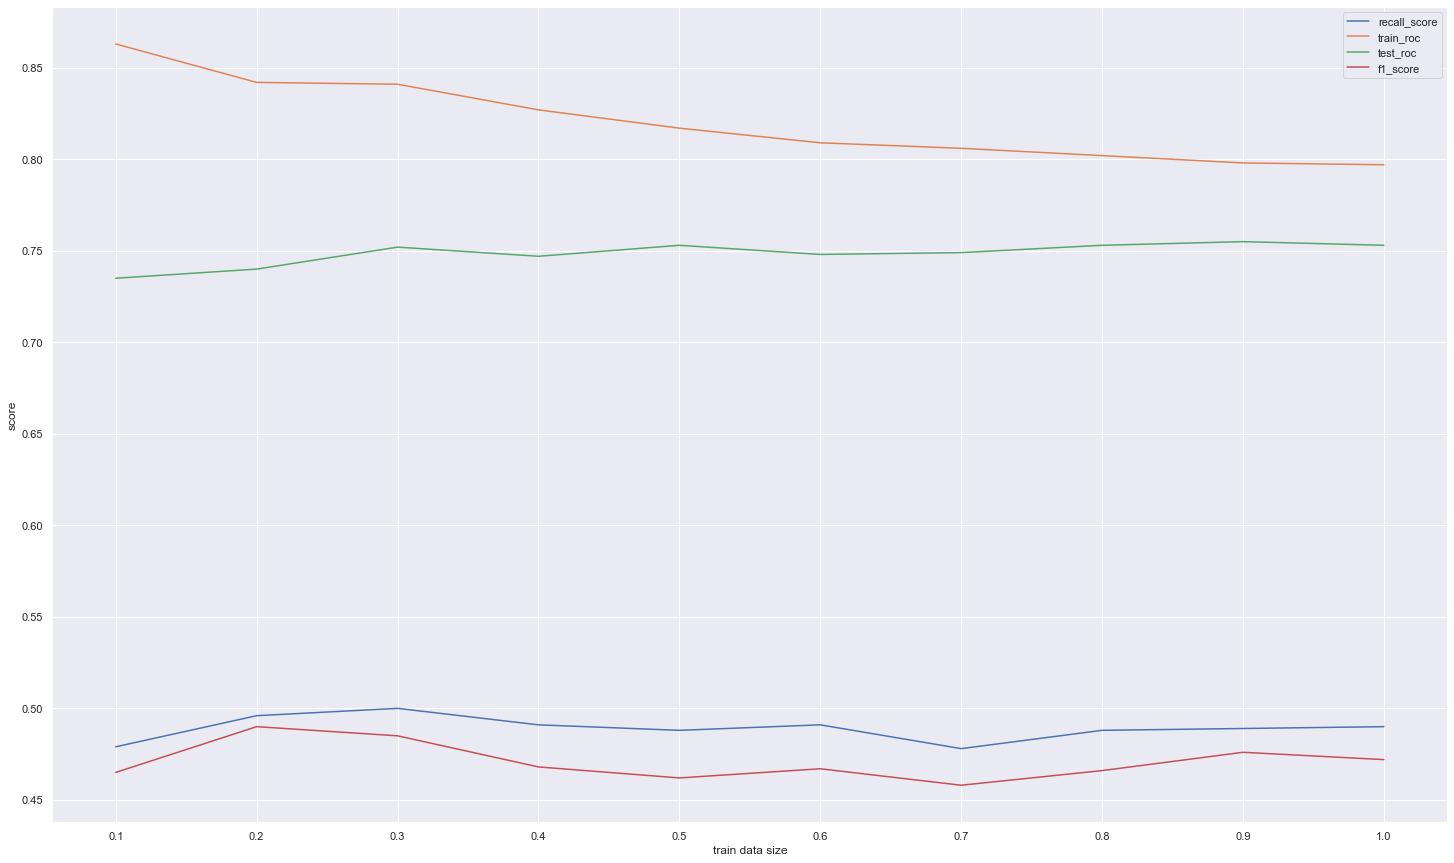

In [32]:
learning_curve_graph(xgb_lc_perf_out)

In [33]:
# Xgboost 2 test set output

In [34]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
params = {'n_estimators': ne,
          'max_depth': md}
xgb = xgboost.XGBClassifier(random_state = 0, max_depth = md, n_estimators = ne)
xgb.fit(X_train, y_train)
xgb_test_perf = model2(xgb, X_train, y_train, X_test, y_test)
xgb_test_perf['n_estimators'] = ne
xgb_test_perf['max_depth'] = md
xgb_test_perf['name'] = 'xgb_test'
xgb_test_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,n_estimators,max_depth,name
0,0.487,0.487,0.798,0.748,0.487,0.478,0.609,8,4,xgb_test


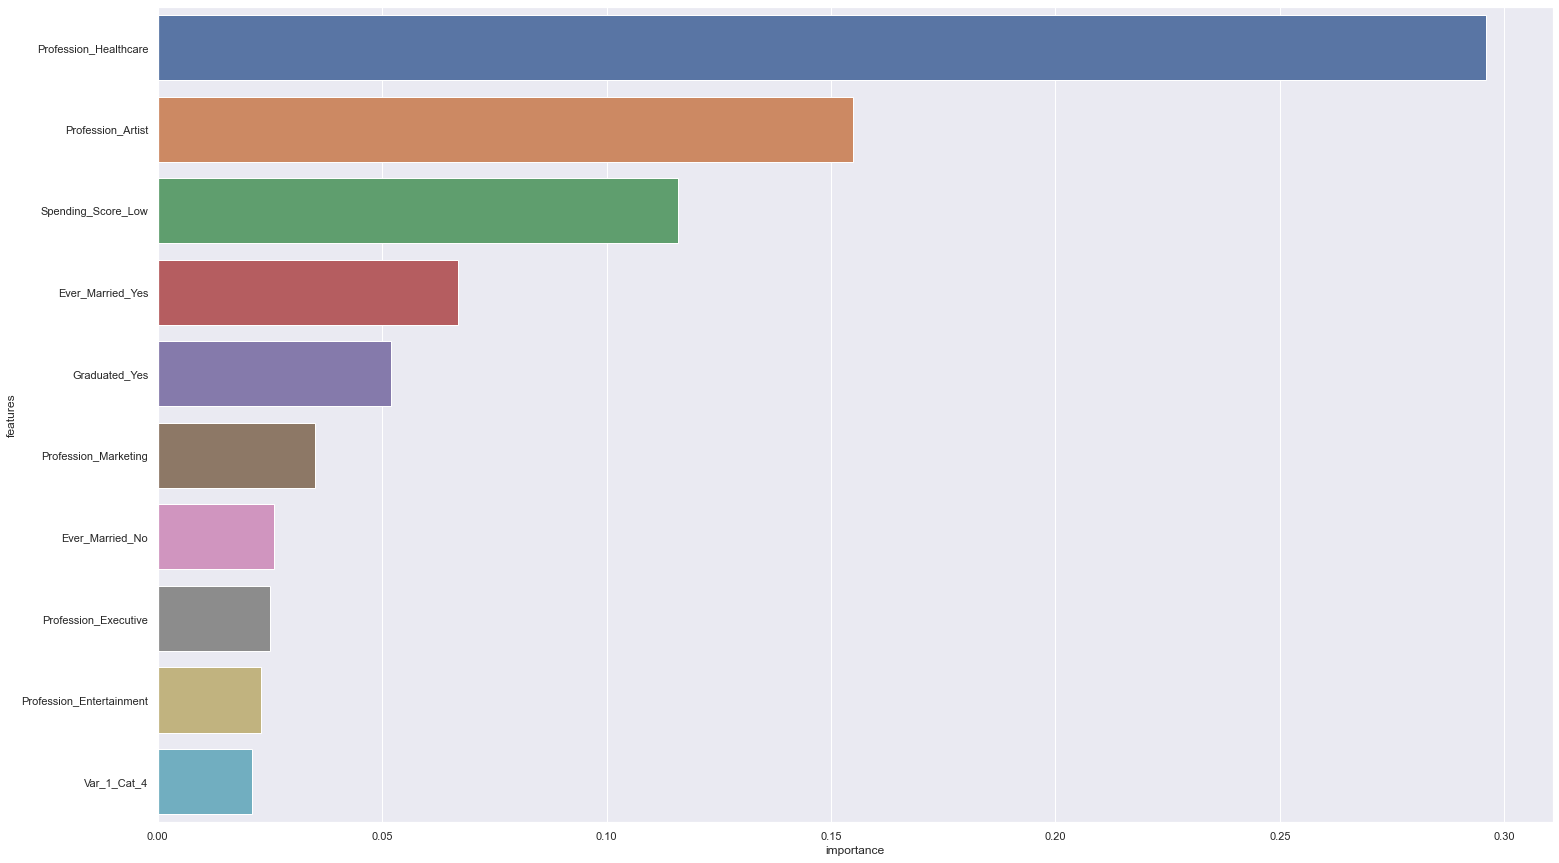

In [35]:
importance_graph(xgb, X_train)

In [36]:
xgb_performance = pd.DataFrame()
xgb_performance=xgb_performance.append([xgb_fe,xgb_tune_perf,xgb_gs_perf,xgb_lc_perf_out,xgb_test_perf]).reset_index()
xgb_performance

,index,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,n_estimators,max_depth,name,train_ratio
0,0,0.501,0.480,0.744,0.746,0.501,0.470,0.219,3,2,xgb_Feature_engineering,NaN
1,0,0.501,0.480,0.744,0.746,0.501,0.470,0.234,3,2,xgb_tune,NaN
2,0,0.490,0.482,0.780,0.750,0.490,0.463,0.359,3,4,xgb_tune,NaN
3,0,0.500,0.469,0.822,0.750,0.500,0.485,0.359,3,6,xgb_tune,NaN
4,0,0.495,0.474,0.864,0.747,0.495,0.484,0.359,3,8,xgb_tune,NaN
5,0,0.498,0.473,0.758,0.753,0.498,0.468,0.359,6,2,xgb_tune,NaN
6,0,0.495,0.485,0.792,0.754,0.495,0.475,0.469,6,4,xgb_tune,NaN
7,0,0.495,0.481,0.839,0.752,0.495,0.481,0.766,6,6,xgb_tune,NaN
8,0,0.489,0.474,0.888,0.748,0.489,0.482,1.016,6,8,xgb_tune,NaN
9,0,0.489,0.484,0.765,0.754,0.489,0.461,0.453,9,2,xgb_tune,NaN


In [37]:
xgb_performance.to_excel('./performance/xgb_perf_data2.xlsx',index=False)